In [136]:
%matplotlib inline
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Logistic Function

In [137]:
def lf(s):   
    return 1./(1 + np.exp(s))

In [74]:
pf = lf
pt = lambda x: 1-pf(x)

In [138]:
ss=np.linspace(-4, 4, 1000)

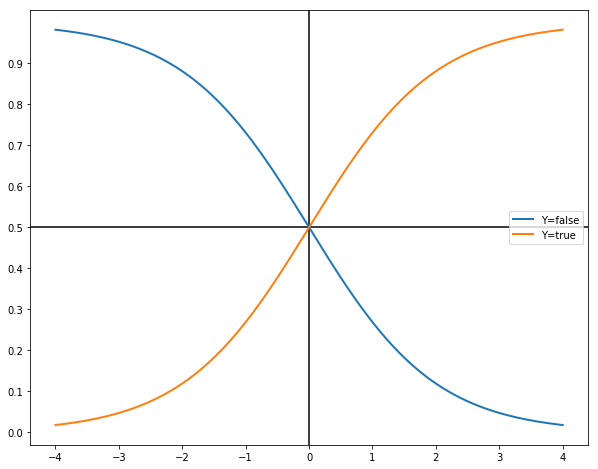

In [139]:
_, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(0, 1, 0.1))
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')
ax.plot(ss, pf(ss), linewidth=2, label='Y=false')
ax.plot(ss, pt(ss), linewidth=2, label='Y=true')
ax.legend()

# No-feature case

In [140]:
def cll(w0, y):
    s_ = 0
    for y_ in y:
        if y_:
            s_ += np.log((pt(w0)))
        else:
            s_ += np.log(pf(w0))
    return s_

In [141]:
def gcll(w0, y):
    g_ = 0
    for y_ in y:
        if y_:
            g_ += pf(w0)
        else:
            g_ -= pt(w0)
    return g_

## Equal class frequencies

In [142]:
y=np.array([False, False, True, True])

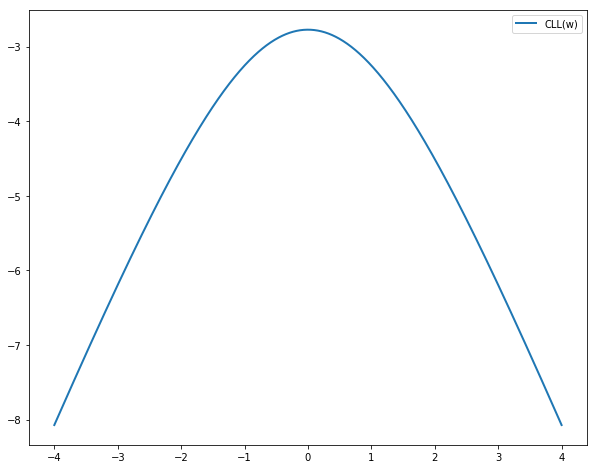

In [144]:
ws = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
ax.plot(ws, [cll(w, y) for w in ws], linewidth=2, label='CLL(w)')
ax.legend()

In [145]:
sol=opt.minimize(lambda w0: -cll(w0, y), 0, jac=lambda w0: -gcll(w0, y), method='BFGS')

In [146]:
sol.x

array([0.])

In [148]:
pf(sol.x[0])

0.5

## Imbalanced Class Distribution

In [150]:
y=np.array([False, False, False, True])

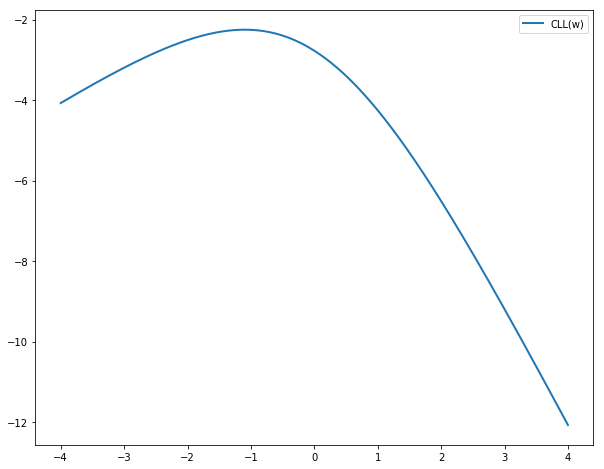

In [151]:
ws = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
ax.plot(ws, [cll(w, y) for w in ws], linewidth=2, label='CLL(w)')
ax.legend()

In [152]:
sol=opt.minimize(lambda w0: -cll(w0, y), 2, jac=lambda w0: -gcll(w0, y), method='BFGS')

In [153]:
sol.x

array([-1.09861244])

In [154]:
pf(sol.x[0])

0.7500000288395265

# One-feature Case

In [159]:
def cll(X, y, w):
    c_ = 0
    for i in range(X.shape[0]):
        s = np.dot(X[i], w).sum()
        if y[i]:
            c_ += np.log(pt(s))
        else:
            c_ += np.log(pf(s))
    return c_

In [160]:
def gcll(X, y, w):
    g_ = np.zeros(len(w))
    for i in range(X.shape[0]):
        s = np.dot(X[i], w).sum()
        p_ = 0
        if y[i]:
            p_ += pf(s)
        else:
            p_ -= pt(s)
        g_ += (p_*X[i]).A1
    return g_

## Noise free

### Equal Class Frequencies

In [161]:
X=np.matrix([[1, -3],
             [1, -3],
             [1, -3],
             [1, 3],
             [1, 3],
             [1, 3]])

In [162]:
y=[False, False, False, True, True, True]

In [164]:
opt.minimize(lambda w: -cll(X, y, w), np.zeros(X.shape[1]), jac=lambda w: -gcll(X, y, w), method='BFGS')

      fun: 3.07417079776363e-06
 hess_inv: array([[ 1.00000000e+00, -5.02728041e-11],
       [-5.02728041e-11,  1.25263762e+04]])
      jac: array([-3.12092042e-16, -9.22251003e-06])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 18
     njev: 19
   status: 0
  success: True
        x: array([-1.45091695e-15,  4.82807819e+00])

In [189]:
sol=opt.minimize(lambda w: -cll(X, y, w), np.zeros(X.shape[1]), jac=lambda w: -gcll(X, y, w), method='BFGS')

In [190]:
sol.x

array([-1.45091695e-15,  4.82807819e+00])

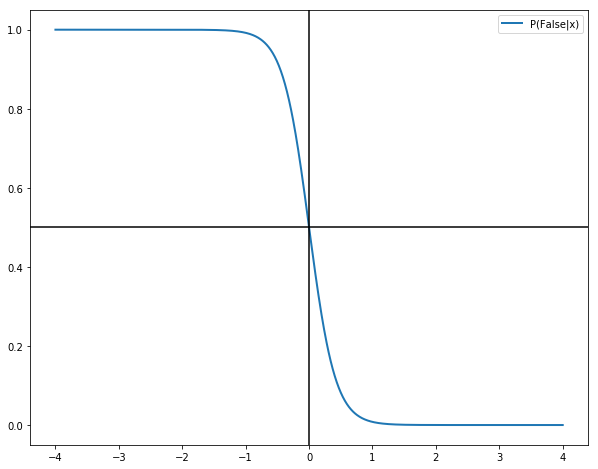

In [167]:
xs = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
ax.plot(xs, [pf(np.dot([1, x], sol.x).sum()) for x in xs], linewidth=2, label='P(False|x)')
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')
ax.legend()

In [187]:
w=2
f=-0.5
pf(w*f)

0.7310585786300049

In [198]:
sol.x=np.array([0., 1])

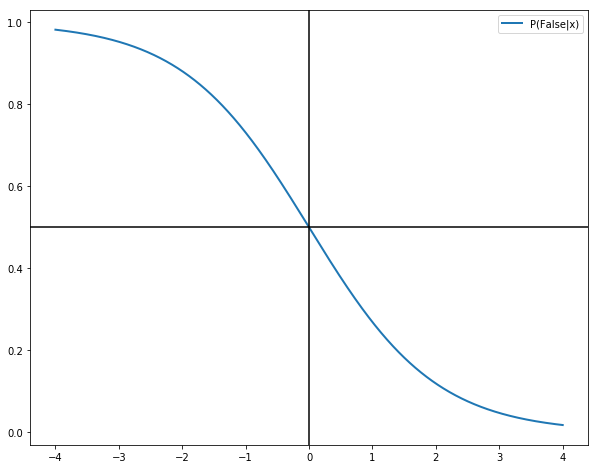

In [199]:
xs = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
ax.plot(xs, [pf(np.dot([1, x], sol.x).sum()) for x in xs], linewidth=2, label='P(False|x)')
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')
ax.legend()

In [200]:
sol.x=np.array([0., 1])

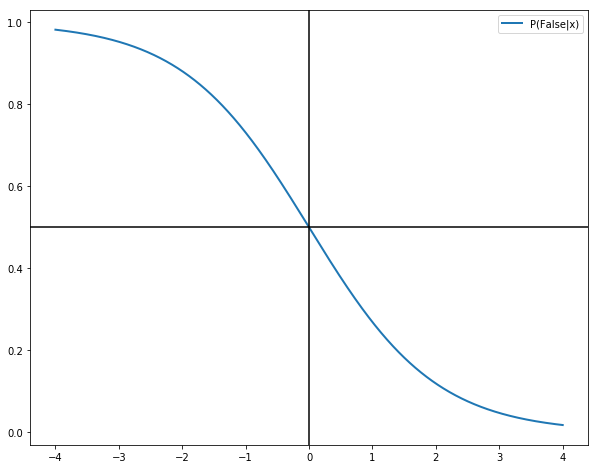

In [201]:
xs = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
ax.plot(xs, [pf(np.dot([1, x], sol.x).sum()) for x in xs], linewidth=2, label='P(False|x)')
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')
ax.legend()

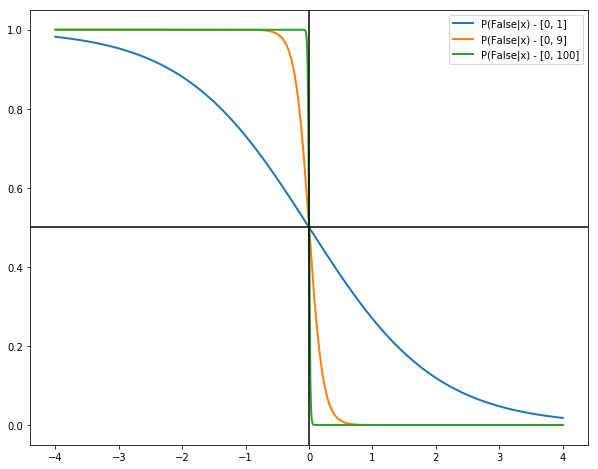

In [202]:
xs = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
ax.plot(xs, [pf(np.dot([1, x], [0, 1]).sum()) for x in xs], linewidth=2, label='P(False|x) - [0, 1]')
ax.plot(xs, [pf(np.dot([1, x], [0, 9]).sum()) for x in xs], linewidth=2, label='P(False|x) - [0, 9]')
ax.plot(xs, [pf(np.dot([1, x], [0, 100]).sum()) for x in xs], linewidth=2, label='P(False|x) - [0, 100]')
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')
ax.legend()

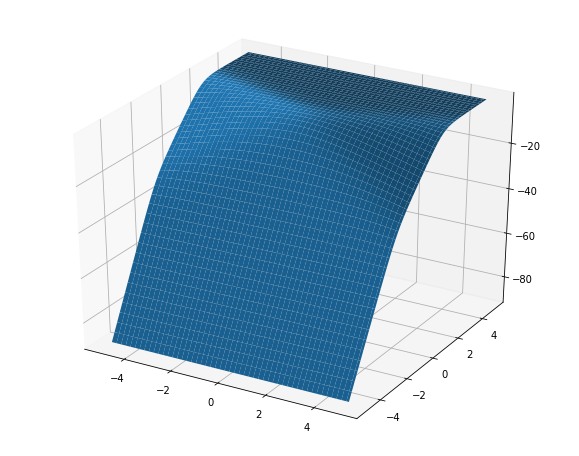

In [203]:
from mpl_toolkits.mplot3d import Axes3D
ws=np.linspace(-5, 5, 100)
fig = plt.figure()
ax = fig.gca(projection='3d')
A , B = np.meshgrid(ws, ws)
z=np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        z[i, j] = cll(X, y, [A[i,j], B[i,j]])
ax.plot_surface(A, B, z)

In [115]:
mi=np.unravel_index(np.argmax(z), (100, 100))

In [116]:
A[mi]

-0.050505050505050164

In [117]:
B[mi]

5.0

### Imbalanced Case

In [204]:
X=np.matrix([[1, -3],
             [1, -3],
             [1, -3],
             [1, -3],
             [1, -3],
             [1, 3]])

In [206]:
y=[False, False, False, False, False, True]

In [208]:
opt.minimize(lambda w: -cll(X, y, w), np.zeros(X.shape[1]), jac=lambda w: -gcll(X, y, w), method='BFGS')

      fun: 3.041229228272068e-06
 hess_inv: array([[  142.84676885,  1376.13675405],
       [ 1376.13675405, 13343.1137533 ]])
      jac: array([ 2.32180341e-06, -9.12368533e-06])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 18
     njev: 19
   status: 0
  success: True
        x: array([0.19969734, 4.879421  ])

In [209]:
sol=opt.minimize(lambda w: -cll(X, y, w), np.zeros(X.shape[1]), jac=lambda w: -gcll(X, y, w), method='BFGS')

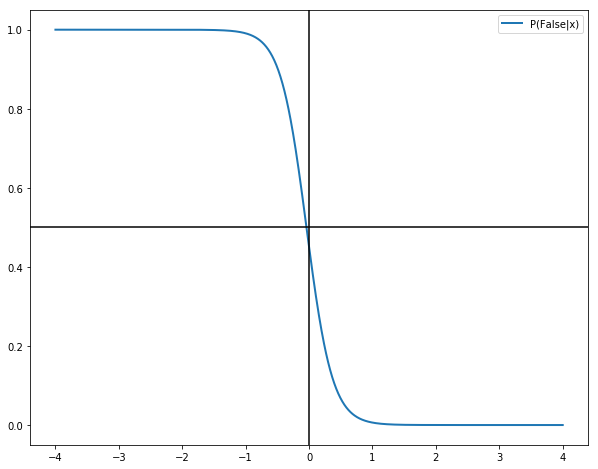

In [210]:
xs = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
ax.plot(xs, [pf(np.dot([1, x], sol.x).sum()) for x in xs], linewidth=2, label='P(False|x)')
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')
ax.legend()

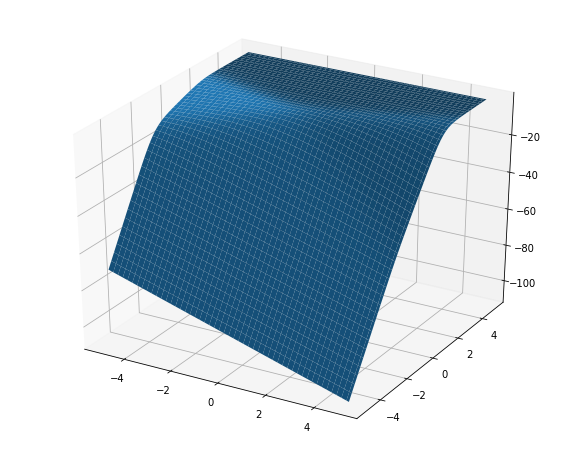

In [123]:
ws=np.linspace(-5, 5, 100)
fig = plt.figure()
ax = fig.gca(projection='3d')
A , B = np.meshgrid(ws, ws)
z=np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        z[i, j] = cll(X, y, [A[i,j], B[i,j]])
ax.plot_surface(A, B, z)

### W0 is not necessarily zero even when class is balanced

In [211]:
X=np.matrix([[1, -1],
             [1, -1],
             [1, 1],
             [1, 2],
             [1, 2],
             [1, 2]])

In [216]:
y=[False, False, False, True, True, True]

In [217]:
sol=opt.minimize(lambda w: -cll(X, y, w), np.zeros(X.shape[1]), jac=lambda w: -gcll(X, y, w), method='BFGS')

In [218]:
sol.x

array([-41.50799261,  27.37946455])

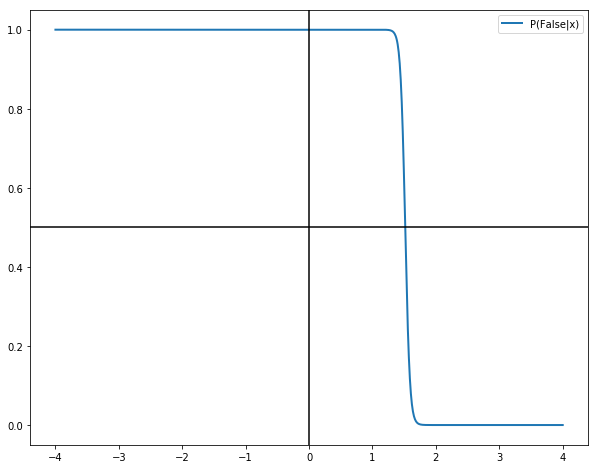

In [219]:
xs = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
ax.plot(xs, [lf(np.dot([1, x], sol.x).sum()) for x in xs], linewidth=2, label='P(False|x)')
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')
ax.legend()

# L2-Regularization

In [221]:
def cll_l2(X, y, w, a):
    c_ = cll(X, y, w)
    w = np.array(w)
    penalty = np.sum(w*w)
    return c_ - a*0.5*penalty

In [222]:
def gcll_l2(X, y, w, a):
    g_ = gcll(X, y, w)
    #penalty = np.sum(w)
    penalty = w
    return g_ - a*penalty

In [223]:
X=np.matrix([[1, -3],
             [1, -3],
             [1, -3],
             [1, 3],
             [1, 3],
             [1, 3]])

In [224]:
y=[False, False, False, True, True, True]

In [233]:
a=1
sol=opt.minimize(lambda w: -cll_l2(X, y, w, a), np.zeros(X.shape[1]), jac=lambda w: -gcll_l2(X, y, w, a), method='BFGS')

In [234]:
sol.x

array([-7.38061006e-17,  9.59118671e-01])

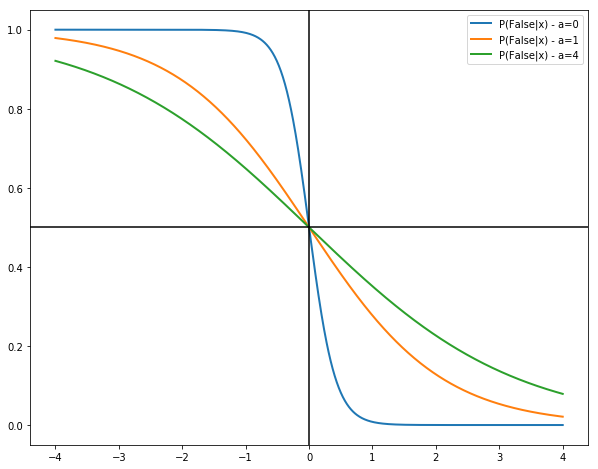

In [235]:
xs = np.linspace(-4, 4, 1000)
_, ax = plt.subplots()
a=0
sol=opt.minimize(lambda w: -cll_l2(X, y, w, a), np.zeros(X.shape[1]), jac=lambda w: -gcll_l2(X, y, w, a), method='BFGS')
ax.plot(xs, [pf(np.dot([1, x], sol.x).sum()) for x in xs], linewidth=2, label='P(False|x) - a=0')
a=1
sol=opt.minimize(lambda w: -cll_l2(X, y, w, a), np.zeros(X.shape[1]), jac=lambda w: -gcll_l2(X, y, w, a), method='BFGS')
ax.plot(xs, [pf(np.dot([1, x], sol.x).sum()) for x in xs], linewidth=2, label='P(False|x) - a=1')
a=4
sol=opt.minimize(lambda w: -cll_l2(X, y, w, a), np.zeros(X.shape[1]), jac=lambda w: -gcll_l2(X, y, w, a), method='BFGS')
ax.plot(xs, [pf(np.dot([1, x], sol.x).sum()) for x in xs], linewidth=2, label='P(False|x) - a=4')
ax.axhline(y=0.5, color='k')
ax.axvline(x=0, color='k')
ax.legend()